<a href="https://colab.research.google.com/github/DSNortsev/Algorithms/blob/master/LeetCode_May_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Task1: Interval List Intersections**

In [14]:
from typing import List, Tuple
def interval_list_intersaction(vector_a: Tuple[int], vector_b: Tuple[int]) -> List[Tuple[int]]:
  """
    Find all intersection between all vectors. All vectors are sorted 
    # sorted_vectors = sorted(vector, key = lamda k:k[0])
  """
  indx_a, indx_b = 0, 0 
  size_a = len(vector_a)
  size_b = len(vector_b)
  result = list()

  # Iterate over each element and stote the answer
  while (indx_a < size_a and indx_b < size_b):
    if vector_b[indx_b][0] <= vector_a[indx_a][1] and \
      vector_a[indx_a][0] <= vector_b[indx_b][1]:
      element1 = max(vector_a[indx_a][0], vector_b[indx_b][0])
      element2 = min(vector_a[indx_a][1], vector_b[indx_b][1])
      result.append([element1, element2])
    
    # Increment the index of pointer A or B
    if vector_a[indx_a][1] > vector_b[indx_b][1]:
      indx_b += 1
    else:
      indx_a += 1
  return result

In [15]:
interval_a = [(0,2), (5,10), (13,23), (24,25)]
interval_b = [(1,5), (8,12), (15,24), (25,26)]

interval_list_intersaction(interval_a, interval_b)

[[1, 2], [5, 5], [8, 10], [15, 23], [24, 24], [25, 25]]

##**Task2: First bad version**

In [ ]:
def fist_bad_version(n: int) -> int:
  """
    Find nad version by using binary search
  """
  start = 0 
  end = n 
  result = n 

  while start <= end:
    mid = (start + end) // 2
    if is_bad_version(mid):
      result = mid
      end = mid - 1
    else:
      start = mid + 1
  return result

##**Task3: Jewels and stones**

In [21]:
def num_jewels_in_stones(jewels: str, stones: str) -> int: 
  # Use set since the hash table is used for searching
  # O(1)
  jewels = set(jewels)
  count = 0

  for stone in stones:
    if stone in jewels:
      count += 1
  return count

##**Task4: Ransom note**

In [ ]:
def is_ransom_note_formed(ransom_note: str, magazine: str) -> bool:
  """
    Use dictionary (hasp map) to check if ransom note can be constructed
  """
  letters_count = dict()
  for letter in magazine:
    if letters_count.get(letter):
      letters_count[letter] += 1
    else:
       letters_count[letter] = 0

  for letter in ransom_note:
    if not letters_count.get(letter) or letters_count.get(letter) - 1 < 0 :
      return False
    letters_count[letter] -= 1
  return True

##**Task5: Number complement**

The complement of an integer is the integer you get when you flip all the 0's to 1's and all the 1's to 0's in its binary representation.

    For example, The integer 5 is "101" in binary and its complement is "010" which is the integer 2.

Given an integer num, return its complement.

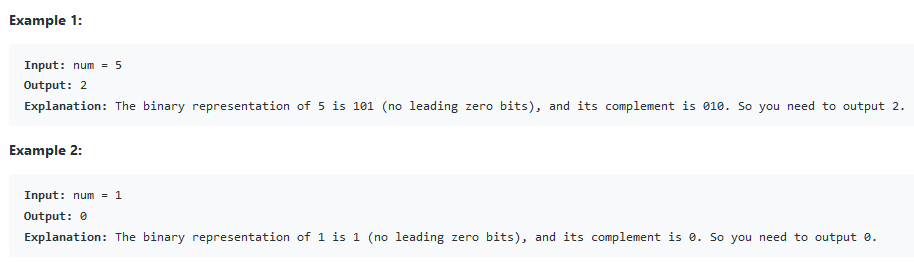

In [31]:
def find_complement(num: int) -> int:
  """
    Convert to binary and slice the prefix of binary indication "0b"
  """
  num = list(str(bin(num)[2:]))
  for i,x in enumerate(num):
    if x == "0":
      num[i] = "1"
    elif x == "1":
      num[i] = "0"
  return(int("".join(num), 2))

In [34]:
print(find_complement(10))
print(find_complement(5))
print(find_complement(1))
print(find_complement(0))

5
2
0
1


##**Task6: First unique characters in a string**

Given a string s, find the first non-repeating character in it and return its index. If it does not exist, return -1.

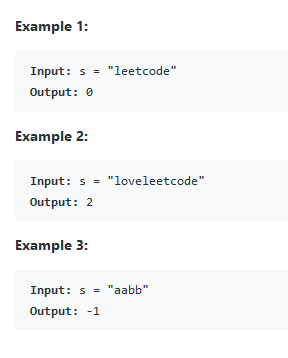

In [52]:
def firts_uniq_char(string: str) -> int:
  """
    Find the first occurrence of unique character in string
  """
  occurrence = {}

  for char in string:
    if char in occurrence:
      occurrence[char] += 1
    else:
      occurrence[char] = 1

  for indx, char in enumerate(string):
    if occurrence[char] == 1:
      return indx
  return -1

In [54]:
print(firts_uniq_char('leetcode'))
print(firts_uniq_char('loveleetcode'))
print(firts_uniq_char('aabb'))

0
2
-1


##**Task7: Majority element**

In [55]:
def majaroty_elements(nums: list) -> int:
  """
    Find the majority element in the list which is greater than n/2.
    Majarity element is guaranteed 
  """
  majority = nums[0]
  count = 1

  for num in nums[1:]:
    if num == majority:
      count += 1
    else:
      count -= 1
      if count == 0:
        majority = num
        count = 1
  return majority

In [56]:
print(majaroty_elements([3,2,3]))
print(majaroty_elements([2,2,1,1,1,2,2]))

3
2


##**Task8: Cousins in a binary tree**

In [60]:
from typing import Tuple
def find_height(current: TreeNode, parent: int, value: int, height: int) -> Tuple(int):
  if not current:
    return parent, 0

  if current.val == value:
    return parent, height

    parent = current.val
    # Left tree
    parent, height = find_height(current.left, parent, value, height+1)
    if height:
      return parent, height
    parent = current.val
    # right tree
    parent, height = find_height(current.right, parent, value, height+1)
    if height:
      return parent, height
    

def is_cousins(root: TreeNode, x: int, y: int) -> bool:
  """
    Two nodes are cousins if they have the same height and diffrent parents
  """

  if root.val == x or root.val == y:
    # Nodes can not be root 
    return False

  parent_x, parent_y  = -1, -1
  height_x = find_height(root, parent_x, x, 0)
  height_y = find_height(root, parent_y, y, 0)

  if parent_x != parent_y and height_x == height_y:
    return True 
  return False

NameError: ignored